# CodeLab 3: Classifacton of WLANs power saving

Energy management is important for electronic devices, and doubly so for portable systems that run on battery power. For this Code Lab, we consider the problem of controlling the power state of the wireless network interface controller. For optimal performance, this power state should adapt to the network usage. We will use a dataset published alongside a paper by Saeed and Kolberg, 2018. The researchers measured the traffic signatures associated with a number of applications, on a mobile phone and labelled each according to the WLAN usage pattern. The dataset comprises 1350 samples with 6 features and a single classification label. The label (the type of usage) was assigned one of four categories: high, varied, buffer, or low. 

<br> In this Codelab we will start with binary classification, in which we will see the difference between weighted and non-weighted binary classification. Secondly, we will develop some multiclass models. There we will see the difference between one-versus-all  and multinomial classification. Various classification metrics will be used to assess the models’ prediction capabilities. 



## Library

In [18]:
# Import packages needed for the lab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, plot_roc_curve, confusion_matrix, precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [19]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


<br> In this lab, we will work on different classifiers for different classification models. Even though the data is already prepared, it is important to get familiar with the data you will work with. 
<br> −Load “Network_Traffic.csv” into Pandas data frame. 

In [20]:
# Import the data and visualize it
data = pd.read_csv('/drive/My Drive/ML/Network_Traffic.csv')
data

,Receiving-data-rate-in-Kbytes-per-seconds,Transmitting-data-rate-in-Kbytes-per-seconds,Total-received-Kbytes,Total-Transmitted-Kbytes,Total-received-packets,Total-Transmitted-packets,Class
0,78.66,87.02,974.37,1000.00,1640,1540,High
1,94.52,91.51,1800.00,1870.00,3240,3040,High
2,69.89,76.95,2800.00,2900.00,5080,4700,High
3,131.25,156.25,3970.00,4140.00,7690,6760,High
4,106.64,115.82,4840.00,5070.00,9810,8400,High
...,...,...,...,...,...,...,...
1345,21.19,0.55,25000.00,439.16,19460,8410,Buffer
1346,11.28,0.10,25150.00,441.95,19580,8460,Buffer
1347,22.98,0.30,25310.00,444.59,19710,8520,Buffer
1348,25.00,0.10,25400.00,445.98,19770,8540,Buffer


## Task 1 - Data Preparation

<br> - 	Split the data frame into features data frame X and label data frame y.

In [21]:
# Seperate features from classes
X = data.loc[:, data.columns != ' Class'].copy()
y = data[[' Class']].copy()

-Calculate and print the correlation matrix of X.

In [22]:
#Correlation matrix
corrMatrix = X.corr()
print(corrMatrix)

                                               Receiving-data-rate-in-Kbytes-per-seconds  \
Receiving-data-rate-in-Kbytes-per-seconds                                       1.000000   
 Transmitting-data-rate-in-Kbytes-per-seconds                                   0.748078   
 Total-received-Kbytes                                                          0.643117   
 Total-Transmitted-Kbytes                                                       0.591491   
 Total-received-packets                                                         0.636381   
 Total-Transmitted-packets                                                      0.496000   

                                                Transmitting-data-rate-in-Kbytes-per-seconds  \
Receiving-data-rate-in-Kbytes-per-seconds                                           0.748078   
 Transmitting-data-rate-in-Kbytes-per-seconds                                       1.000000   
 Total-received-Kbytes                                             

-Plot the heat map of correlation matrix X using the Seaborn library (heatmap). 

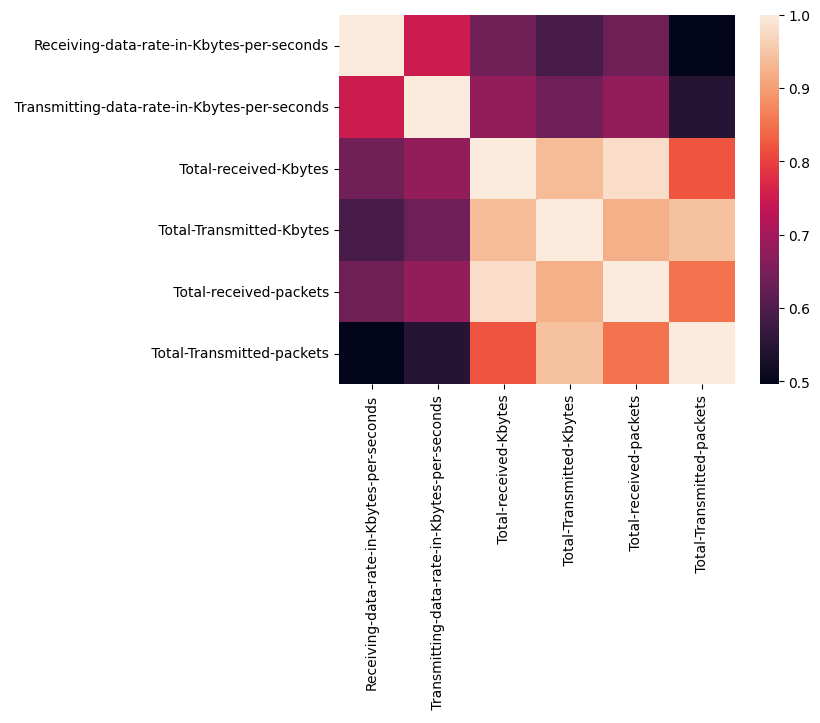

In [23]:
#Heatmap
sn.heatmap(data=corrMatrix)
plt.show()

In [24]:
corrMatrix

,Receiving-data-rate-in-Kbytes-per-seconds,Transmitting-data-rate-in-Kbytes-per-seconds,Total-received-Kbytes,Total-Transmitted-Kbytes,Total-received-packets,Total-Transmitted-packets
Receiving-data-rate-in-Kbytes-per-seconds,1.000000,0.748078,0.643117,0.591491,0.636381,0.496000
Transmitting-data-rate-in-Kbytes-per-seconds,0.748078,1.000000,0.681459,0.639431,0.681218,0.545820
Total-received-Kbytes,0.643117,0.681459,1.000000,0.935787,0.981267,0.820463
Total-Transmitted-Kbytes,0.591491,0.639431,0.935787,1.000000,0.921450,0.943146
Total-received-packets,0.636381,0.681218,0.981267,0.921450,1.000000,0.851075
Total-Transmitted-packets,0.496000,0.545820,0.820463,0.943146,0.851075,1.000000


−Plot the 2 variables with the most correlation in a scatter plot.

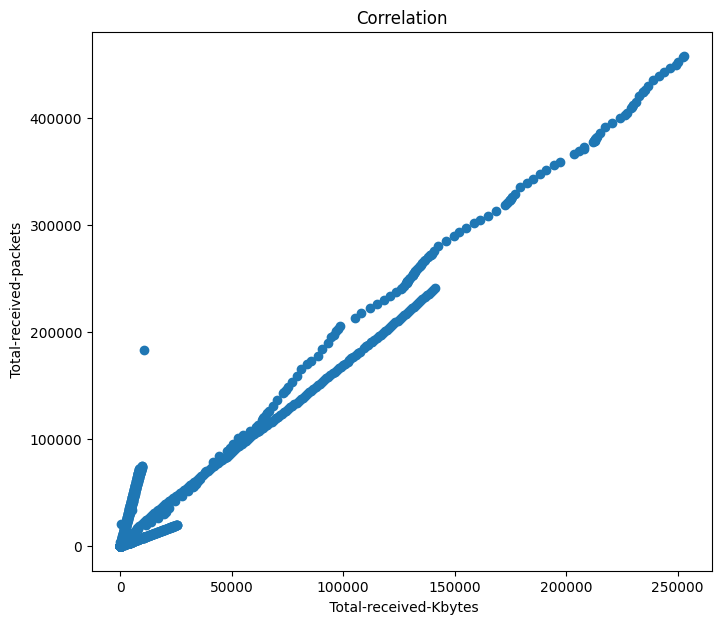

In [25]:
#Scatter plot
def find_max(df):
  '''
  Find the greatest value in the correlation matrix except 1.0.
  '''
  # Initialise the max value
  max = 0

  # Access the values.
  values = df.values

  # Searching for the maximum value, and the corresponding indices.
  for i in range(values.shape[0]):
    for j in range(values.shape[1]):
      if values[i, j] != 1 and values[i, j] > max:
        max = values[i, j]
        max_row = i
        max_col = j

  # Acquire the lables of the rows and columns according to the indices.
  row_name = df.index[max_row]
  col_name = df.columns[max_col]
  
  return max, max_row, max_col, row_name, col_name


_, _, _, x_name, y_name = find_max(corrMatrix)

# Plot
x = X[x_name].values
y = X[y_name].values

fig, ax = plt.subplots(figsize=(8, 7))
ax.set_title('Correlation')
ax.scatter(x, y)
ax.set_xlabel(x_name)
ax.set_ylabel(y_name)
plt.show()

-Create an array named “y_2c” for two class classification. Convert the samples with the high label as 1 and the rest as 0. 

In [26]:
# Creat one-versus-all with 'High' as 1, all other are labeled 0
y = data[[' Class']].copy()
y_2c = y.copy()

# Labelling by replacement.
y_2c[' Class'] = y_2c[' Class'].replace(['High', 'Varied', 'Low', 'Buffer'], [1, 0, 0, 0])

−	Calculate the ratio of high-class samples to all samples. 

In [27]:
#Ratio of high-class 
y_2c_values = y_2c.values
ratio = y_2c_values.sum()/y_2c_values.size
print(ratio)

0.4444444444444444


-Create an array named “y_mc” that can be used for multiclass classification. Use numerical labels according to the class, as follows: 3-High, 2-Varied, 1-Low, 0-Buffer.

In [28]:
# Create the Multi class y vector
y = data[[' Class']].copy()
y_mc = y.copy()

# Labelling by replacement.
y_mc[' Class'] = y_mc[' Class'].replace(['High', 'Varied', 'Low', 'Buffer'], [3, 2, 1, 0])

−	Plot the distribution of labels in the data set using a bar plot. 

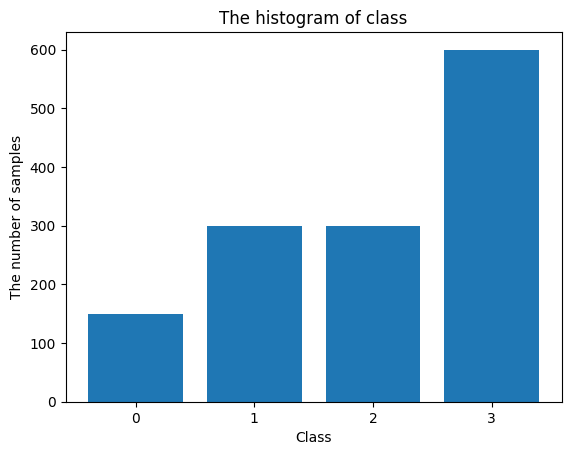

In [29]:
#Plot the distribution of labels.
unique, counts = np.unique(y_mc, return_counts=True)

# Get the information by indexing the corresponding class name.
c_high = counts[np.where(unique == 3)]
c_var = counts[np.where(unique == 2)]
c_low = counts[np.where(unique == 1)]
c_buff = counts[np.where(unique == 0)]
plt.style.use('default')

# make data:
np.random.seed(3)
x = [3, 2, 1, 0]
y = np.concatenate((c_high, c_var, c_low, c_buff))

fig, ax = plt.subplots()
ax.bar(x, y)
ax.set(xticks=np.arange(0, 4))
ax.set_xlabel('Class')
ax.set_ylabel('The number of samples')
ax.set_title('The histogram of class')
plt.show()

-Convert data frames X, y_2c, and  y_mc  to NumPy arrays (if they were Pandas objects). Convert the label vector elements to integers using the following notation, y.astype(‘int’), where y is the label vector.  

In [30]:
# Convert to array
y_2c_data = y_2c.values.astype('int')
y_mc_data = y_mc.values.astype('int')
X_data = X.values

-Scale the feature matrix X with the StandardScaler() function from Sklearn. 	

In [31]:
#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

In [32]:
# Calculation of the share of each label in multiclass classification
total = c_high + c_low + c_var + c_buff
high_p = c_high/total
var_p = c_var/total
low_p = c_low/total
buf_p = c_buff/total

print('The proportion of high class is: ' + str(high_p.item()))
print('The proportion of varied class is: ' + str(var_p.item()))
print('The proportion of low class is: ' + str(low_p.item()))
print('The proportion of buffer class is: ' + str(buf_p.item()))

The proportion of high class is: 0.4444444444444444
The proportion of varied class is: 0.2222222222222222
The proportion of low class is: 0.2222222222222222
The proportion of buffer class is: 0.1111111111111111


Questions:
<br> 1) Which variables have the highest correlation? Does this make sense to you? Why?
<br> 2) What is the ratio of high-class labels in binary classification?
<br> 3) What is the share of each label in multiclass classification?
<br>4) Why might scaling improve the prediction capability of machine learning?

Answers:
<br> 1) The variables 'Total received packets' and 'Total received Kbytes' are highly correlated. Because packets are composed of many Kbytes, the number of packets should be able to reflect the number of bytes, making it reasonable.
<br> 2) The ratio is 0.444.
<br> 3) The shares of the high, varied, low, buffer classes are 0.44, 0.22, 0.22 and 0.11 respectively. 
<br> 4) When a variable has more than one features, due to the different characters and units, some features may have much greater magnitude compared with other features, resulting that such features dominates other features. And the gradient descent algorithm, which is applied widely in machine learning algorithms, wastes lots of unnecessary time in exploring the direction. By scaling, different features have similar magnitudes, whose patterns can be learnt more easily.

## Task 2: Binary classification with Logistic Regression

In the second task, you will develop a binary classifier (one versus all) to detect whether the wireless network is operating in high consumption mode or not. ML models will be tested based on 25% of the input data. You are free to develop your own functions using Sklearn functions for tasks like training, predicting, or performance evaluation. 

−	Split the data into training and test sets using the “train_test_split” function from Sklearn. Use 4720 as the random state parameter to control the split. 

In [33]:
#Train test split
Shuffle_state = 4720
X_train_2c, X_test_2c, y_train_2c, y_test_2c = train_test_split(X_scaled, y_2c_data, test_size=0.25, random_state=Shuffle_state)

<br>−Develop and train a logistic regression model with default parameters. 
<br>−Use the trained model to predict test labels. 

In [34]:
#Logistic regression
clf_lr = LogisticRegression().fit(X_train_2c, y_train_2c.ravel())
y_prediction = clf_lr.predict(X_test_2c)

−Calculate and print the following performance metrics: Accuracy, recall, precision, and F1 score.

In [35]:
#Performance metrics
Accuracy_LR = accuracy_score(y_prediction, y_test_2c)
F1_LR = f1_score(y_prediction, y_test_2c)
Precision_LR = precision_score(y_prediction, y_test_2c)
Recall_LR = recall_score(y_prediction, y_test_2c)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

Accuracy: 0.9378698224852071
F1 score: 0.9292929292929293
Recall score: 1.0
Precision score: 0.8679245283018868


−Plot the receiver operating characteristics (ROC) curve of training and test data in the same figure. By default, the logistic regression model uses a cut-off value of 0.5 to assign a positive or negative prediction to a data point. Different values can be used to bias the prediction towards negative or positive outcomes. The ROC curve plots the combinations of specificity and recall (sensitivity) that result from a range of cut-off values. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


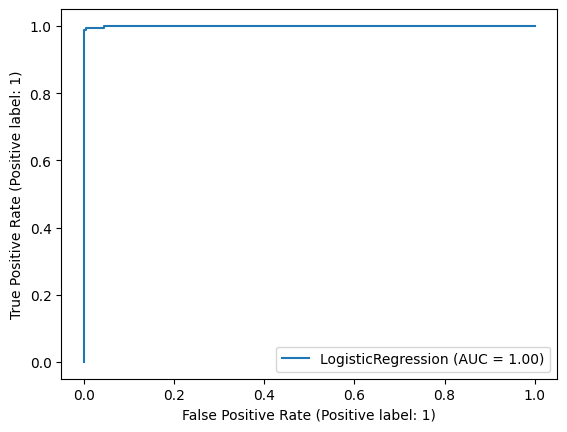

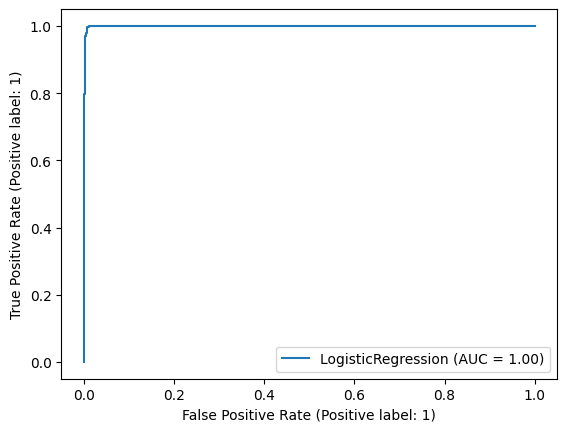

In [36]:
#ROC curve
# ax = plt.gca()
test_disp = plot_roc_curve(clf_lr, X_test_2c, y_test_2c)
train_disp = plot_roc_curve(clf_lr, X_train_2c, y_train_2c)
plt.show()

−Generate and plot the confusion matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


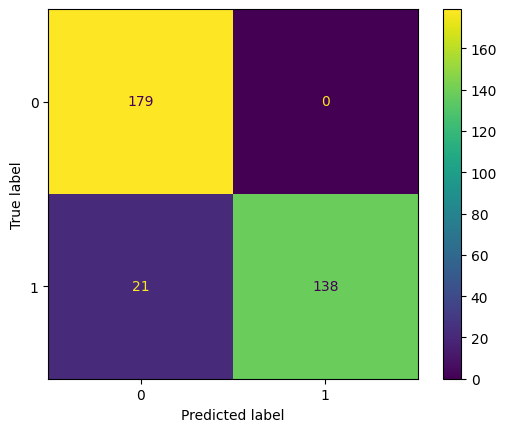

In [37]:
#Confusion Matrix
confusion_matrix(y_test_2c, y_prediction, labels=['0', '1'])
plot_confusion_matrix(clf_lr, X_test_2c, y_test_2c)

The class weight parameter adjusts the penalization factor of misclassified examples in model training. Depending on the application selection of weights varies. For example, in medical testing, the cost of false negatives (absence of a disease when it is present) outweighs the cost of false positives (incorrect indication of a disease when it is not present). In this binary classification, we need to modify the weights to reduce the number of missed high cases (false negatives).
<br> -Develop and train a logistic regression model using the “class_weight” parameter to reduce the number of false negatives in the test data (y_(2c_test)=1, but y_pred = 0).
<br> -Print out the selected weights. 


In [38]:
#Weighted logistic regression
w_0 = 1
w_1 = 20
clf_lr_w = LogisticRegression(class_weight={0:w_0, 1:w_1}).fit(X_train_2c,y_train_2c.ravel())
y_prediction_w = clf_lr_w.predict(X_test_2c)
print(w_0)
print(w_1)

1
20


−Calculate and print the following performance metrics: Accuracy, recall, precision, and F1 score.

In [39]:
#Performance metrics
Accuracy_LRw = accuracy_score(y_prediction_w, y_test_2c)
F1_LRw = f1_score(y_prediction_w, y_test_2c)
Precision_LRw = precision_score(y_prediction_w, y_test_2c)
Recall_LRw = recall_score(y_prediction_w, y_test_2c)
print("Accuracy: " + str(Accuracy_LRw))
print("F1 score: " + str(F1_LRw))
print("Recall score: " + str(Recall_LRw))
print("Precision score: " + str(Precision_LRw))

Accuracy: 1.0
F1 score: 1.0
Recall score: 1.0
Precision score: 1.0


−Plot receiver operating characteristics (ROC) curve of training and test data in the same figure.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


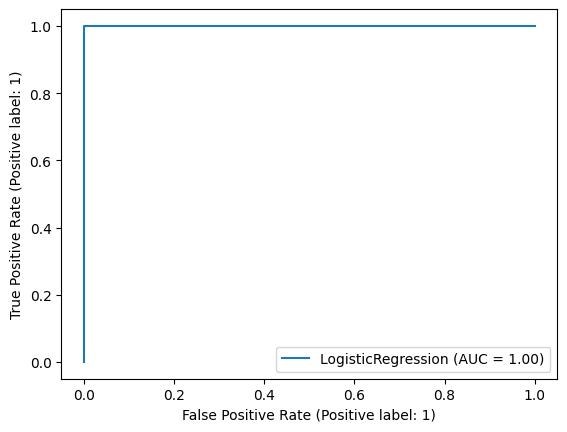

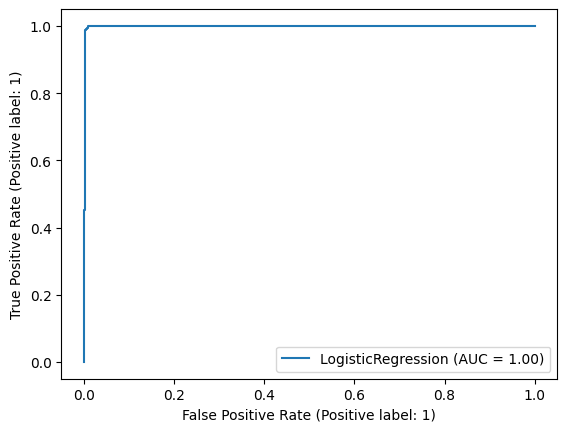

In [40]:
#ROC curve
# ax = plt.gca()
test_disp = plot_roc_curve(clf_lr_w, X_test_2c, y_test_2c)
train_disp = plot_roc_curve(clf_lr_w, X_train_2c, y_train_2c)
plt.show()

−Generate and plot the confusion matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


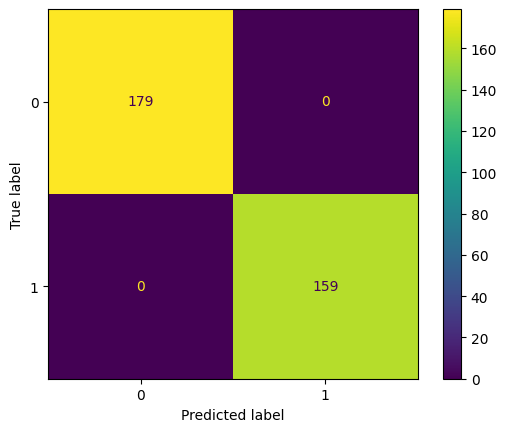

In [41]:
#Confusion Matrix
confusion_matrix(y_test_2c, y_prediction_w, labels=['0', '1'])
plot_confusion_matrix(clf_lr_w, X_test_2c, y_test_2c)


<br>Questions :
<br>1) What differences do you find between train and test ROC curves in the logistic regression model?
<br>2) What does the confusion matrix represent?
<br>3) How do the weights influence the results of our classification in logistic regression?
<br>4) What metrics are good to use to compare models? How can you decide what is a good model?

<br> Answers:
<br>1) There are slight differences in the wave of two figures. The training curve has grater square with x-axis, indicating slightly higher accuracy in the training set.
<br>2) The confusion matrix presents the differences between predicted and true lables, give the information of the number of each part in the matrix.
<br>3) The weight influces the resulting by assigning a high weight parameter to the more important class. Therefore, when calculating the loss, the wrong predicted label in the highly weighted class results in high loss value due to the high weight parameter. In this case, less wrong labels in this class will be observed for minimising the loss.
<br>4) All the metrics are good when comparing the models (includng f1, accuracy, precision, etc.), which one is chosen depends on the requirements and the context. F1_score may be the more balanced one and is chosen more frequently because it considers the presion score and the recall score simultaneously. The model with a higher score of the chosen metric is better the others.

## Task 3: Binary classification with SVM

In this task you will develop multiple support vector classifiers (SVC) for the binary classification task. 
<br> -Develop and train a linear SVC with the given parameters [C=1.0, coef0=0.0, tol=1e-3]. (Note: default kernel is RBF and must be changed to linear)

In [42]:
clf_svmlin = svm.SVC(kernel='linear', C=1.0, coef0=0.0, tol=1e-3).fit(X_train_2c, y_train_2c.ravel())
y_prediction_svmlin = clf_svmlin.predict(X_test_2c)

−Calculate and print the following performance metrics: Accuracy, recall, precision, and F1 score.

In [43]:
#Performance metrics
Accuracy_svmlin = accuracy_score(y_prediction_svmlin, y_test_2c)
F1_svmlin = f1_score(y_prediction_svmlin, y_test_2c)
Precision_svmlin = precision_score(y_prediction_svmlin, y_test_2c)
Recall_svmlin = recall_score(y_prediction_svmlin, y_test_2c)
print("Accuracy: " + str(Accuracy_svmlin))
print("F1 score: " + str(F1_svmlin))
print("Recall score: " + str(Recall_svmlin))
print("Precision score: " + str(Precision_svmlin))

Accuracy: 0.9733727810650887
F1 score: 0.970873786407767
Recall score: 1.0
Precision score: 0.9433962264150944


−Plot receiver operating characteristics (ROC) curve of training and test data in the same figure.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


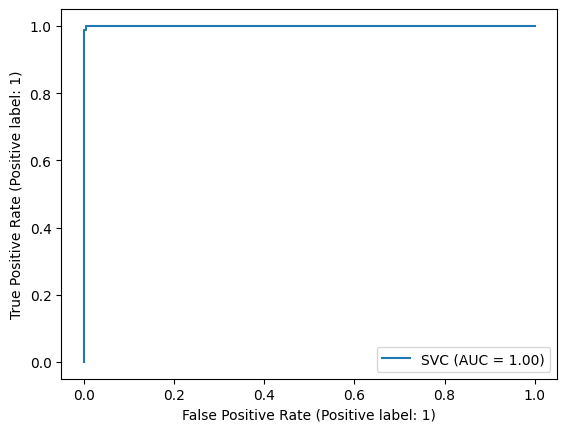

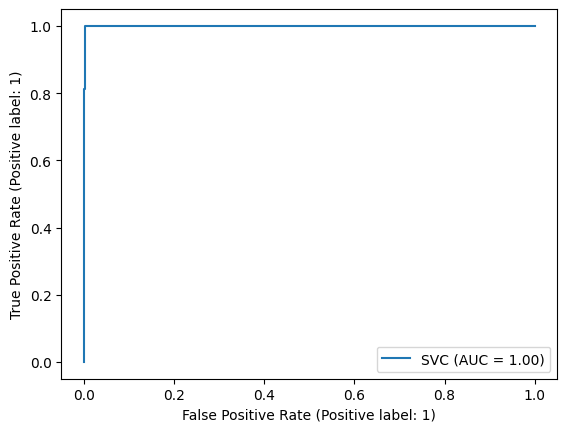

In [44]:
# ax = plt.gca()
test_disp = plot_roc_curve(clf_svmlin, X_test_2c, y_test_2c)
train_disp = plot_roc_curve(clf_svmlin, X_train_2c, y_train_2c)

−Generate and plot the confusion matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


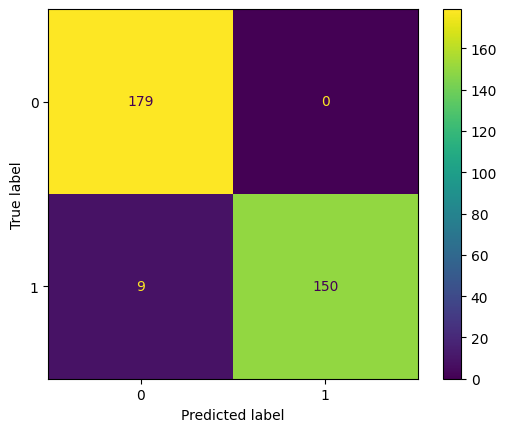

In [45]:
#Confusion Matrix
confusion_matrix(y_test_2c, y_prediction_svmlin, labels=['0', '1'])
plot_confusion_matrix(clf_svmlin, X_test_2c, y_test_2c)

Next step, you will investigate the impact of hyperparameters. The regularization parameter (C) adjusts the penalty factor for samples in training.
<br>-Develop two linear SVCs, one with parameter C as 0.0001 and one with C as 100, then train both models. (tol=1e-3)


In [46]:
#SVC construction for C=0.0001 and C=100
clf_svmlin2 = svm.SVC(kernel='linear', C=0.0001, coef0=0.0, tol=1e-3).fit(X_train_2c, y_train_2c.ravel())
y_prediction_svmlin2 = clf_svmlin2.predict(X_test_2c)

clf_svmlin3 = svm.SVC(kernel='linear', C=100, coef0=0.0, tol=1e-3).fit(X_train_2c, y_train_2c.ravel())
y_prediction_svmlin3 = clf_svmlin3.predict(X_test_2c)

−Calculate and print the following performance metrics for both cases: Accuracy, recall, precision, and F1 score.

In [47]:
#Performance metrics C=0.0001
Accuracy_svmlin2 = accuracy_score(y_prediction_svmlin2, y_test_2c)
F1_svmlin2 = f1_score(y_prediction_svmlin2, y_test_2c)
Precision_svmlin2 = precision_score(y_prediction_svmlin2, y_test_2c)
Recall_svmlin2 = recall_score(y_prediction_svmlin2, y_test_2c)
print("Accuracy: " + str(Accuracy_svmlin2))
print("F1 score: " + str(F1_svmlin2))
print("Recall score: " + str(Recall_svmlin2))
print("Precision score: " + str(Precision_svmlin2))

Accuracy: 0.5473372781065089
F1 score: 0.07272727272727272
Recall score: 1.0
Precision score: 0.03773584905660377


In [48]:
#Performance metrics C=100
Accuracy_svmlin3 = accuracy_score(y_prediction_svmlin3, y_test_2c)
F1_svmlin3 = f1_score(y_prediction_svmlin3, y_test_2c)
Precision_svmlin3 = precision_score(y_prediction_svmlin3, y_test_2c)
Recall_svmlin3 = recall_score(y_prediction_svmlin3, y_test_2c)
print("Accuracy: " + str(Accuracy_svmlin3))
print("F1 score: " + str(F1_svmlin3))
print("Recall score: " + str(Recall_svmlin3))
print("Precision score: " + str(Precision_svmlin3))

Accuracy: 0.985207100591716
F1 score: 0.9841269841269842
Recall score: 0.9935897435897436
Precision score: 0.9748427672955975


−	Plot the receiver operating characteristic (ROC) curves for both cases separately.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


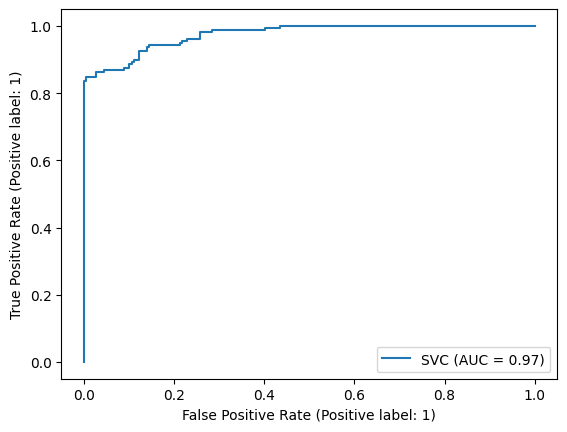

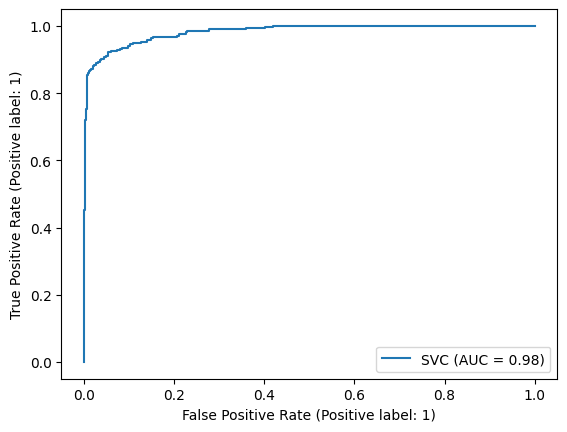

In [49]:
#ROC curve for C=0.0001
# ax = plt.gca()
test_disp = plot_roc_curve(clf_svmlin2, X_test_2c, y_test_2c)
train_disp = plot_roc_curve(clf_svmlin2, X_train_2c, y_train_2c)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


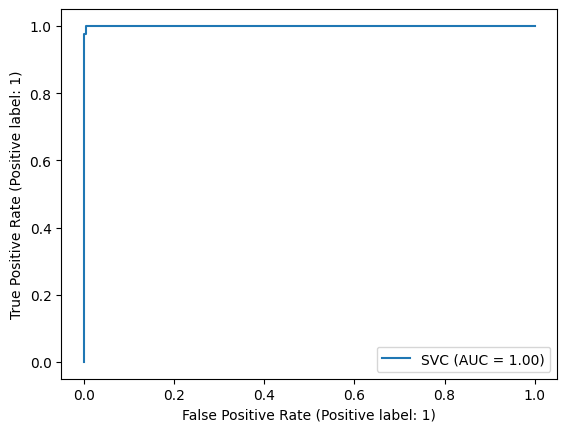

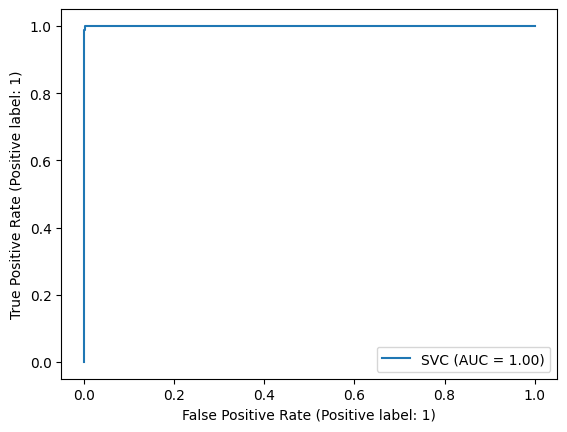

In [50]:
#ROC curve for C=10
# ax = plt.gca()
test_disp = plot_roc_curve(clf_svmlin3, X_test_2c, y_test_2c)
train_disp = plot_roc_curve(clf_svmlin3, X_train_2c, y_train_2c)

−	Generate and plot the confusion matrices for both cases separately.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


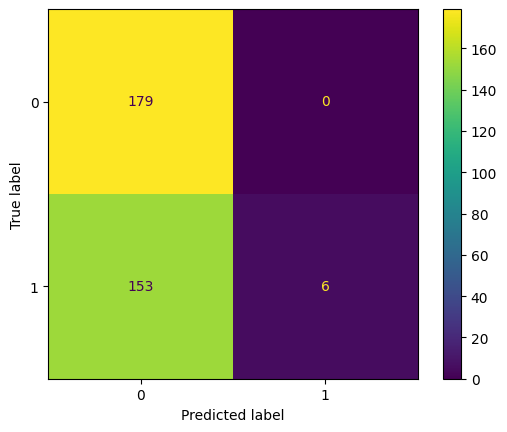

In [51]:
#Confusion matrix C=0.0001
confusion_matrix(y_test_2c, y_prediction_svmlin2, labels=['0', '1'])
plot_confusion_matrix(clf_svmlin2, X_test_2c, y_test_2c)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


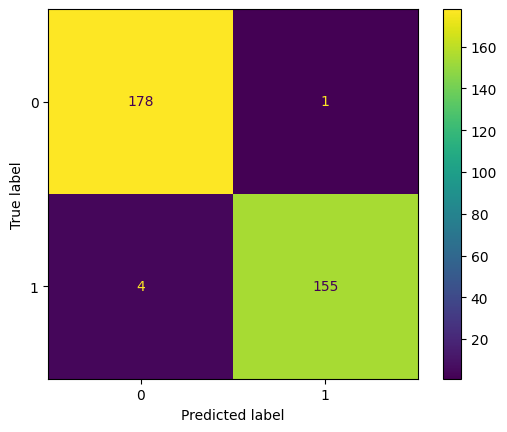

In [52]:
#Confusion matrix C=100
confusion_matrix(y_test_2c, y_prediction_svmlin3, labels=['0', '1'])
plot_confusion_matrix(clf_svmlin3, X_test_2c, y_test_2c)

The other tunable hyperparameter is tolerance which adjusts the stopping criteria of the optimizer. 
<br>−	Develop and train a linear SVC with the given parameters [C=1.0, coef0=0.0, tol=10]. 


In [53]:
#Tolerance 10
clf_svmlin4 = svm.SVC(kernel='linear', C=1.0, coef0=0.0, tol=10).fit(X_train_2c, y_train_2c.ravel())
y_prediction_svmlin4 = clf_svmlin4.predict(X_test_2c)

In [54]:
#Performance metrics tolerance 10
Accuracy_svmlin4 = accuracy_score(y_prediction_svmlin4, y_test_2c)
F1_svmlin4 = f1_score(y_prediction_svmlin4, y_test_2c)
Precision_svmlin4 = precision_score(y_prediction_svmlin4, y_test_2c)
Recall_svmlin4 = recall_score(y_prediction_svmlin4, y_test_2c)
print("Accuracy: " + str(Accuracy_svmlin4))
print("F1 score: " + str(F1_svmlin4))
print("Recall score: " + str(Recall_svmlin4))
print("Precision score: " + str(Precision_svmlin4))

Accuracy: 0.47041420118343197
F1 score: 0.6398390342052314
Recall score: 0.47041420118343197
Precision score: 1.0


−Plot receiver operating characteristics (ROC) curve of training and test data in the same figure.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


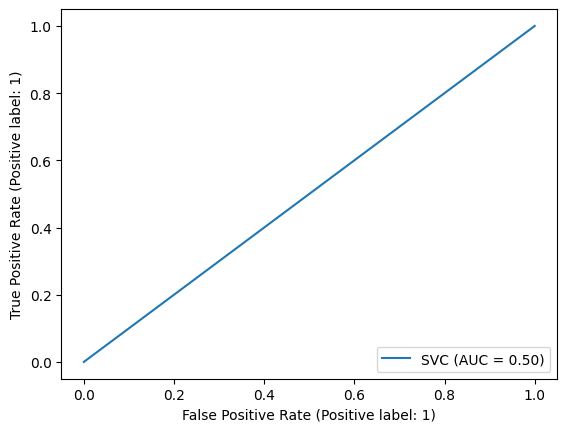

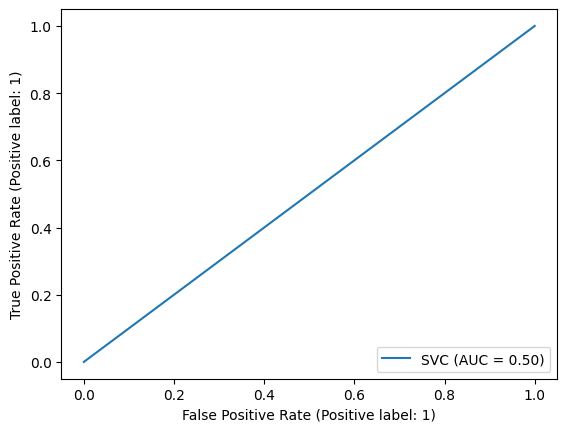

In [55]:
#ROC curve for tolerance 10
# ax = plt.gca()
test_disp = plot_roc_curve(clf_svmlin4, X_test_2c, y_test_2c)
train_disp = plot_roc_curve(clf_svmlin4, X_train_2c, y_train_2c)

−Generate and plot the confusion matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


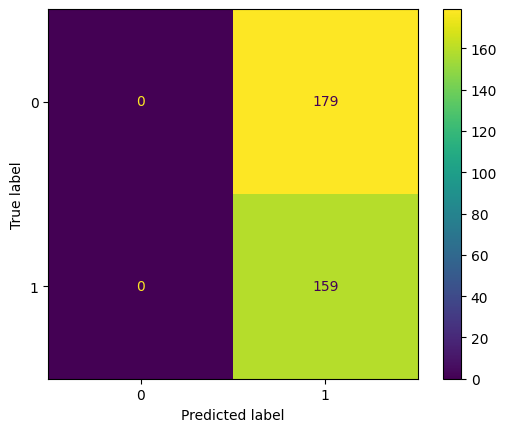

In [56]:
#Confusion matrix tolerance 10
confusion_matrix(y_test_2c, y_prediction_svmlin4, labels=['0', '1'])
plot_confusion_matrix(clf_svmlin4, X_test_2c, y_test_2c)

Kernels are decision functions applied to transform the feature space into higher dimensions. Nonlinear relationships between features can be found in high-dimensional space. In this CodeLab you will use a polynomial SVC (SVM classifier with a polynomial kernel). 
<br> −Develop and train two polynomial SVCs [kernel=’poly’] one with the degree of 3 and one with the degree of 2.  [C=1.0, coef0=0.0, tol=1e-3]. 

In [57]:
#Polynomial SVM with 2nd and 3rd degree. 
clf_svmpoly1 = svm.SVC(kernel='poly', C=1.0, coef0=0.0, tol=1e-3, degree=2).fit(X_train_2c, y_train_2c.ravel())
y_prediction_svmpoly1 = clf_svmpoly1.predict(X_test_2c)

clf_svmpoly2 = svm.SVC(kernel='poly', C=1.0, coef0=0.0, tol=1e-3, degree=3).fit(X_train_2c, y_train_2c.ravel())
y_prediction_svmpoly2 = clf_svmpoly2.predict(X_test_2c)

−Calculate and print the following performance metrics for both cases: Accuracy, recall, precision, and F1 score.

In [58]:
#Performance metrics polynomial 3rd 
Accuracy_svmpoly2 = accuracy_score(y_prediction_svmpoly2, y_test_2c)
F1_svmpoly2 = f1_score(y_prediction_svmpoly2, y_test_2c)
Precision_svmpoly2 = precision_score(y_prediction_svmpoly2, y_test_2c)
Recall_svmpoly2 = recall_score(y_prediction_svmpoly2, y_test_2c)
print("Accuracy: " + str(Accuracy_svmpoly2))
print("F1 score: " + str(F1_svmpoly2))
print("Recall score: " + str(Precision_svmpoly2))
print("Precision score: " + str(Recall_svmpoly2))

Accuracy: 0.9349112426035503
F1 score: 0.9261744966442953
Recall score: 0.8679245283018868
Precision score: 0.9928057553956835


In [59]:
#Performance metrics polynomial 2nd
Accuracy_svmpoly = accuracy_score(y_prediction_svmpoly1, y_test_2c)
F1_svmpoly = f1_score(y_prediction_svmpoly1, y_test_2c)
Precision_svmpoly = precision_score(y_prediction_svmpoly1, y_test_2c)
Recall_svmpoly = recall_score(y_prediction_svmpoly1, y_test_2c)
print("Accuracy: " + str(Accuracy_svmpoly))
print("F1 score: " + str(F1_svmpoly))
print("Recall score: " + str(Precision_svmpoly))
print("Precision score: " + str(Recall_svmpoly))

Accuracy: 0.8757396449704142
F1 score: 0.8478260869565216
Recall score: 0.7358490566037735
Precision score: 1.0


−	Generate and plot the confusion matrices for both cases separately.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


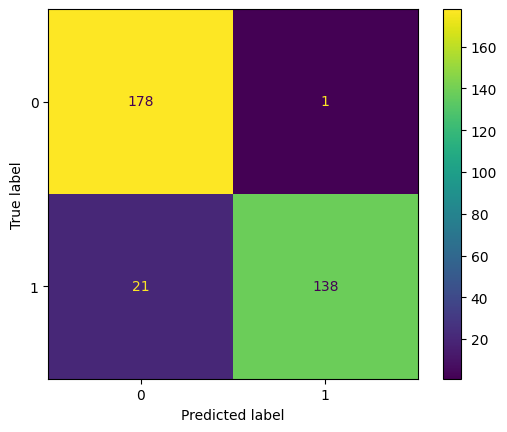

In [60]:
#Confusion matrix poly 3rd
confusion_matrix(y_test_2c, y_prediction_svmpoly2, labels=['0', '1'])
plot_confusion_matrix(clf_svmpoly2, X_test_2c, y_test_2c)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


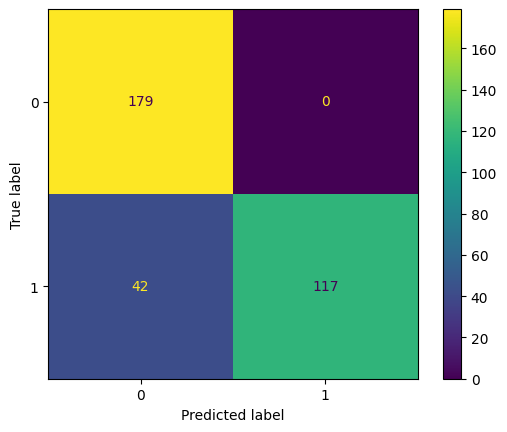

In [61]:
#Confusion matrix poly 2nd
confusion_matrix(y_test_2c, y_prediction_svmpoly1, labels=['0', '1'])
plot_confusion_matrix(clf_svmpoly1, X_test_2c, y_test_2c)

Questions 
<br> 1) Compare linear SVM and logistic regression models.
<br> 2) What did you observe when parameter C is varied? Explain the role of parameter C in SVC.
<br> 3) What did you observe when tolerance is changed to 10? Explain the role of parameter tolerance in SVC.
<br> 4) Compare polynomial SVM with the linear SVM. What is the potential benefit of using nonlinear kernel? 
<br> 5) Rank the models from the highest performance to the lowest one with F1 scores.

Answers
**<br> 1) The default linear SVM model behaves as well as the linear regression model.**
<br> 2) The higher C is, the better performance does the model have. The parameter C controls the significance of the regularizor in the model, which can be seen as a role controling the importance of misclassfied items. The higher C is, the less items are allowed to be wrongly classfied.
<br> 3) The tolerence == 10 results in much more misclassfied items of the model. It generally controls the proportion of the allowed misclassfied items.
<br> 4) The linear kernel avoids over-fitting, which can be brought by the polynomial kernel conveniently.
<br> 5) The performance rank is: (Linear, C=10) > (Linear, default) > (Poly, degree = 3) > (Poly, degree = 2) > (Linear, tolerance = 10) > (Linear, C = 0.0001)

## Task 4: Multi-class classification

Multi-class classification predicts the best among a set of labels (four, in this case). We consider two different model classes (logistic regression and SVM) and within the logistic regression model, both the One vs. All and the multi-class approach. 
<br> The One vs. All (called ‘one versus rest’ in sklearn) method constructs binary classifiers for each class. The final prediction is based on the model with the highest score or the largest (signed) distance from the classification boundary. 

<br>-Split the data (X, and y_mc) into training (75%) and test sets (25%) using the “train_test_split” function from Sklearn. Use 4720 as the random state parameter to control the split.  

In [62]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X_scaled, y_mc_data, test_size=0.25, random_state=Shuffle_state)

-Develop and train a logistic regression model using the one vs. rest (parameter multi_class=’ovr’) method using the “y_mc” label vector. 

In [63]:
clf_lr_ovr = LogisticRegression(multi_class='ovr').fit(X_train_mc, y_train_mc.ravel())
y_prediction_lrovr = clf_lr_ovr.predict(X_test_mc)

−	Calculate and print the accuracy of the model. 

In [64]:
#Accuracy of OVR LR
Accuracy_lrovr = accuracy_score(y_prediction_lrovr, y_test_mc)
print("Accuracy: " + str(Accuracy_lrovr))

Accuracy: 0.8698224852071006


−Generate and plot the confusion matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


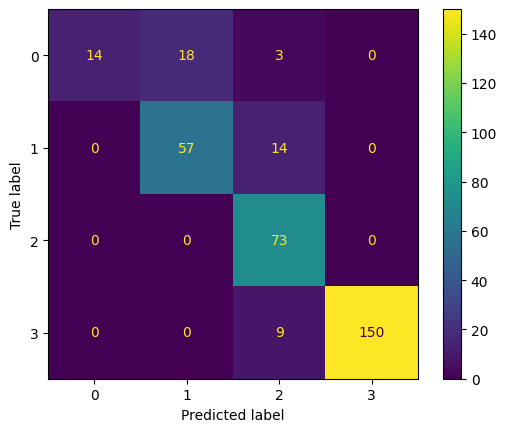

In [65]:
#Confusion matrix OVR LR
confusion_matrix(y_test_mc, y_prediction_lrovr, labels=['0', '1'])
plot_confusion_matrix(clf_lr_ovr, X_test_mc, y_test_mc)

For logistic regression, we can also directly train a multi-class classifier using the multi-class cross-entropy loss (sklearn calls this the multinomial cross-entropy loss).  
<br>−Develop and train a multi-class logistic regression model (parameter multi_class=’multinomial’)


In [66]:
clf_lr_mult = LogisticRegression(multi_class='multinomial').fit(X_train_mc, y_train_mc.ravel())
y_prediction_lrmult = clf_lr_mult.predict(X_test_mc)

−	Calculate and print the accuracy of the model. 

In [67]:
#Accuracy of Mult LR
Accuracy_lrmult = accuracy_score(y_test_mc, y_prediction_lrmult)
print("Accuracy: " + str(Accuracy_lrmult))

Accuracy: 0.9142011834319527


−Generate and plot the confusion matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


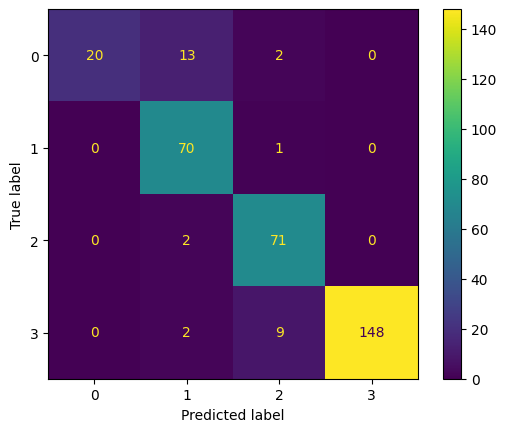

In [68]:
#Confusion matrix mult LR
confusion_matrix(y_test_mc, y_prediction_lrmult, labels=['0', '1'])
plot_confusion_matrix(clf_lr_mult, X_test_mc, y_test_mc)

SVM can be used in multi-class classification tasks as well, but it will rely on the one-versus-all approach (or, for non-linear kernels, on the related one-versus-one approach). 

<br> - Develop and train a linear SVC [kernel=’linear’] as a one vs. all classifier with the given parameters [C=1.0, coef0=0.0, tol=1e-3]. 

In [69]:
#OVR SVM
clf_svmlin_mc_ovr = svm.SVC(kernel='linear', C=1.0, coef0=0.0, tol=1e-3).fit(X_train_mc, y_train_mc.ravel())
y_prediction_svmovr = clf_svmlin_mc_ovr.predict(X_test_mc)

−	Calculate and print the accuracy of the model. 

In [70]:
#Accuracy of SVM
Accuracy_svmovr = accuracy_score(y_test_mc, y_prediction_svmovr)
print("Accuracy: " + str(Accuracy_svmovr))

Accuracy: 0.9497041420118343


−Generate and plot the confusion matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


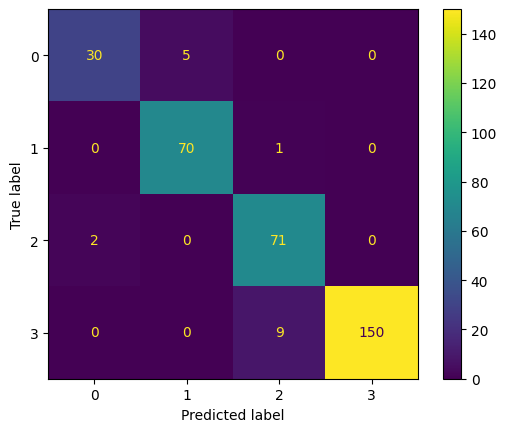

In [71]:
#Confusion matrix SVM OVR
confusion_matrix(y_test_mc, y_prediction_svmovr, labels=['0', '1'])
plot_confusion_matrix(clf_svmlin_mc_ovr, X_test_mc, y_test_mc)

Questions:
<br>1) How does the performance change for both classification methods for the logistic regression and why?
<br>2) Which classification method is more computationally demanding and why? 
<br>3) Why other classification metrics cannot be used directly in multi-class classification tasks?
<br>4) Why can multi-class classification be directly applied to logistic regression but not SVM?
<br>5) Compare all three models’ performance in multi-class classification.
<br>6) Which classes have higher mismatches in logistic regression? 
<br>7) Which classes have higher mismatches in SVM?  

Answers
<br>1) The second method (mvm) performs better than the first model (ovr). Because the ovr model tends to misclassfy samples in the joint area.
<br>2) The MvM method is more computationally demanding, because it labels the classes for many times and introduces ECOC into it.
<br>3) In the multi classfication there are more than two variables, which cannot be put into the formulas of the binary metrics.
<br>4) Because SVM is designed for binary classification tasks.
<br>5) SVM > LogisticRegression(Mult) > LogisticRegression(OvR).
<br>6) Class Buffer
<br>7) Class High



### Bonus Task

Conduct a multi-class classification using only binary classifiers. You can use either logistic regression or SVM. Describe the steps you follow and how it works. Calculate each classifier’s output probabilities for the test data and plot them in ascending order.  

In [97]:
y = data[[' Class']].copy()
# Split training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=Shuffle_state)

# Labelling.
y_train_h = y_train.copy()
y_train_v = y_train.copy()
y_train_l = y_train.copy()
y_train_b = y_train.copy()

y_train_h[' Class'] = y_train_h[' Class'].replace(['High', 'Varied', 'Low', 'Buffer'], [1, 0, 0, 0])
y_train_v[' Class'] = y_train_v[' Class'].replace(['High', 'Varied', 'Low', 'Buffer'], [0, 1, 0, 0])
y_train_l[' Class'] = y_train_l[' Class'].replace(['High', 'Varied', 'Low', 'Buffer'], [0, 0, 1, 0])
y_train_b[' Class'] = y_train_b[' Class'].replace(['High', 'Varied', 'Low', 'Buffer'], [0, 0, 0, 1])

y_train_h_data = y_train_h.values.astype('int')
y_train_v_data = y_train_v.values.astype('int')
y_train_l_data = y_train_l.values.astype('int')
y_train_b_data = y_train_b.values.astype('int')

# Classification using logistic regression.
clf_h = LogisticRegression().fit(X_train, y_train_h_data.ravel())
y_pre_h = clf_h.predict(X_test)
proba_h = clf_h.predict_proba(X_test)
clf_v = LogisticRegression().fit(X_train, y_train_v_data.ravel())
y_pre_v = clf_v.predict(X_test)
proba_v = clf_h.predict_proba(X_test)
clf_l = LogisticRegression().fit(X_train, y_train_l_data.ravel())
y_pre_l = clf_l.predict(X_test)
proba_l = clf_l.predict_proba(X_test)
clf_b = LogisticRegression().fit(X_train, y_train_b_data.ravel())
y_pre_b = clf_b.predict(X_test)
proba_b = clf_b.predict_proba(X_test)

# Descide the class of a sample by the max probability.
# Only the propability a sample is classfied as 1 in the four classfiers are compared.
classes = []
for i in range(X_test.shape[0]):
  probabilities = [clf_h.predict_proba(X_test)[i, 1], clf_v.predict_proba(X_test)[i, 1], clf_l.predict_proba(X_test)[i, 1], clf_b.predict_proba(X_test)[i, 1]]
  classes.append(probabilities.index(max(probabilities)))

In [103]:
# Output the prediction results.
classes = pd.DataFrame(classes)
classes[0] = classes[0].replace([0, 1, 2, 3], ['High', 'Varied', 'Low', 'Buffer'])
classes

,0
0,Low
1,High
2,High
3,High
4,High
...,...
333,Varied
334,High
335,High
336,Low
